# GÖZDE KIRBIZ 191180053

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
import numpy as np
import seaborn as sns

In [2]:
df_titanic = pd.read_csv('train.csv')
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Soru 1

In [3]:
df_titanic[-6:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


# Soru 2

In [4]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Soru 3

In [5]:
print("Size:",df_titanic.size)
print("Dimension:",df_titanic.ndim)

Size: 10692
Dimension: 2


# Soru 4

In [6]:
df_titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Some passengers' age, cabin and embarked values are missing. As shown above, 177 of the passengers has no age data, 687 passengers have no cabin data and 2 passengers have no embarked data.

# Soru 5

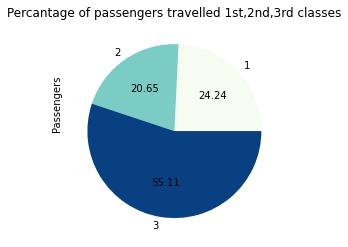

In [8]:
df_titanic.groupby('Pclass').size().plot(kind='pie',fontsize=10,autopct='%.2f',cmap='GnBu')
plt.ylabel("Passengers",horizontalalignment='left')
plt.title("Percantage of passengers travelled 1st,2nd,3rd classes",fontsize=12);

More than half of the passengers were travelling in the 3rd class. Nearly quarter of them were 1st class and 2nd class was the least crowded.

# Soru 6

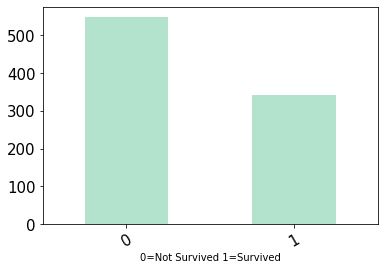

In [9]:
df_titanic.groupby('Survived').size().plot(kind='bar',xlabel="0=Not Survived 1=Survived",fontsize=15,rot=30,cmap='Pastel2');


# Soru 7

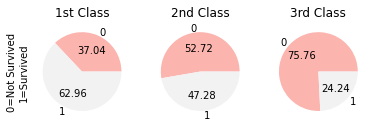

In [10]:
pclass1 = df_titanic[df_titanic['Pclass']==1]
s_1=pclass1.groupby('Survived').size()
pclass2 = df_titanic[df_titanic['Pclass']==2]
s_2=pclass2.groupby('Survived').size()
pclass3 = df_titanic[df_titanic['Pclass']==3]
s_3=pclass3.groupby('Survived').size()
plt.subplot(1, 3, 1) 
s_1.plot(kind='pie',fontsize=10,autopct='%.2f',title='1st Class',ylabel='0=Not Survived\n1=Survived',cmap='Pastel1')
plt.subplot(1, 3, 2)
s_2.plot(kind='pie',fontsize=10,autopct='%.2f',title='2nd Class',ylabel='',cmap='Pastel1')
plt.subplot(1, 3, 3)
s_3.plot(kind='pie',fontsize=10,autopct='%.2f',title='3rd Class',ylabel='',cmap='Pastel1');

# Soru 8

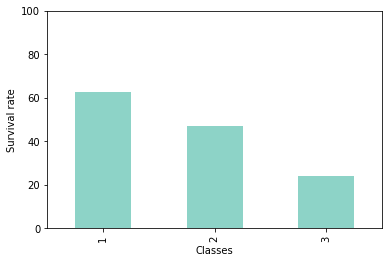

In [11]:
pclasses = df_titanic.groupby('Pclass')
survived_by_class = pclasses['Survived'].sum()
srate = survived_by_class / pclasses.size()*100
plt.axes()
plt.ylim([0,100])
srate.plot(kind='bar',xlabel='Classes',ylabel='Survival rate',cmap='Set3');

1st class passengers have the most survival rate (more than 60%), followed by 2nd class(around 50%) and lastly 3rd class (nearly %30), which is not surprising. First-class passengers had been rescued first because most of them were from royalty and they were privileged. 3rd class passengers had paid much less money and they were not the top priority.

# Soru 9

In [12]:
pd.crosstab(df_titanic['Sex'], df_titanic['Survived'], margins=True)


Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [13]:
male= df_titanic['Sex'].where(df_titanic['Sex'] == 'male')
female= df_titanic['Sex'].where(df_titanic['Sex'] == 'female')
survivedmale=male.where(df_titanic['Survived'] == 1).count()
survivedfemale=female.where(df_titanic['Survived'] == 1).count()
srate_male=survivedmale/male.count()*100
srate_female=survivedfemale/female.count()*100
print("Survive rate of male:",srate_male)
print("Survive rate of female:",srate_female)


Survive rate of male: 18.890814558058924
Survive rate of female: 74.20382165605095


# Soru 10

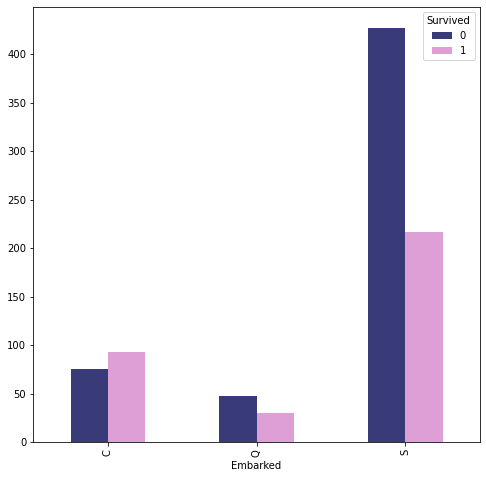

In [14]:
df_titanic.dropna(subset = ['Embarked'])
emb = pd.crosstab(index=df_titanic["Embarked"],columns=df_titanic["Survived"])
emb.plot(kind="bar", figsize=(8,8), stacked=False,cmap='tab20b');

# Soru 11

In [15]:
df_titanic.dropna(subset = ['Age'])
df_titanic['Age group'] = pd.cut(x=df_titanic['Age'], bins=[0, 18, 60,1000],labels=['child','adult','old'])
pd.crosstab([df_titanic.Sex,df_titanic.Survived],df_titanic['Age group'],margins=True)

Age group        child  adult  old  All
Sex    Survived                        
female 0            22     42    0   64
       1            46    148    3  197
male   0            47    296   17  360
       1            24     67    2   93
All                139    553   22  714

In general, more females survived than male passengers. For children, survivor female children are more than male ones. For adults, the same scenario is happening, but more drastically. No old female passenger died, all of them were rescued. But almost all of the old male passengers died, only 2 of them were rescued. It is because females and children were top priority when rescuing happened.

# Soru 12

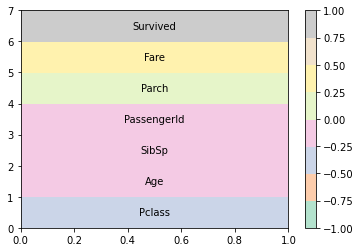

In [16]:
df_titanic.dropna(subset = ['Age'])
df_titanic.dropna(subset = ['Embarked'])
correlations=df_titanic.corr()[['Survived']].sort_values(by='Survived')
rowNames = list(correlations.index.values)
plt.pcolormesh(correlations, cmap='Pastel2' ,vmin=-1,vmax=1)
cb = plt.colorbar();
for i in range(len(correlations)):
    plt.text(0.5,0.5+i,rowNames[i],horizontalalignment='center',verticalalignment='center')

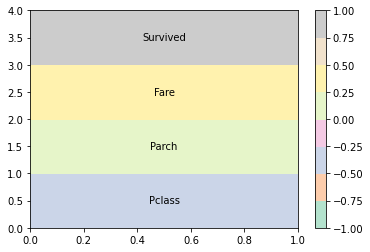

In [17]:
top3correlations=pd.DataFrame(df_titanic[['Survived','Pclass','Fare','Parch']].corr()['Survived'],columns=['Survived']).sort_values(by='Survived')
rowNames2 = list(top3correlations.index.values)
plt.pcolormesh(top3correlations, cmap='Pastel2' ,vmin=-1,vmax=1)
cb = plt.colorbar();
for i in range(len(top3correlations)):
    plt.text(0.5,0.5+i,rowNames2[i],horizontalalignment='center',verticalalignment='center')

Fare and Parch have the most strong positive relationship, while Pclass has the strongest negative relationship. So I choose them as top three strong attributes.However, I think we should have considered genders as well, by mapping strings to integer values. Since it wasn't mentioned in the question and I couldn't decide how should I give value to genders, I didn't include it. Also, I think it is worth to mention that Parch has a stronger correlation than Age.

# Soru 13

In [18]:
df_titanic['Titles'] = df_titanic['Name'].str.split(",").str.get(1).str.split(".").str.get(0)
print("\nThe most used title is",df_titanic['Titles'].value_counts().idxmax())


The most used title is  Mr


# Soru 14

In [19]:
print("Distinct title number is:",df_titanic['Titles'].value_counts().count())
print(df_titanic['Titles'].value_counts())

Distinct title number is: 17
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Don               1
 Ms                1
 Mme               1
 Sir               1
 Capt              1
 Lady              1
 the Countess      1
 Jonkheer          1
Name: Titles, dtype: int64


# Soru 15

In [20]:
df_titanic.dropna(subset = ['Age'])
print("The average age of passengers:",df_titanic['Age'].mean())

The average age of passengers: 29.69911764705882


# Soru 16

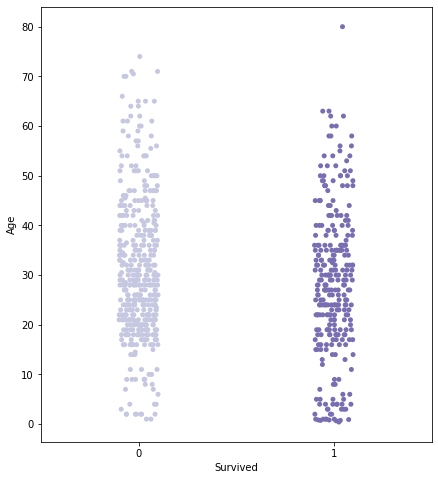

In [21]:
df_titanic.dropna(subset = ['Age'])
plt.figure(figsize = (7,8))
sns.stripplot(x=df_titanic['Survived'],y=df_titanic['Age'],palette="Purples");

# Soru 17

In [22]:
df_titanic.dropna(subset = ['Age'])
oldest_survivor=df_titanic['Age'].where(df_titanic['Survived'] == 1)
print("The oldest survivor's age is : ",oldest_survivor.max())

The oldest survivor's age is :  80.0


# Soru 18-19

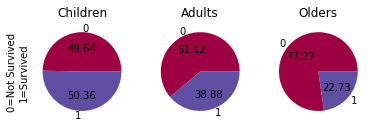

In [23]:
df_titanic.dropna(subset = ['Age'])
children = df_titanic[df_titanic['Age']<=18]
s_1=children.groupby('Survived').size()
adults= df_titanic[(df_titanic['Age']>18)&(df_titanic['Age']<=60)]
s_2=adults.groupby('Survived').size()
old = df_titanic[df_titanic['Age']>60]
s_3=old.groupby('Survived').size()
plt.subplot(1, 3, 1) 
s_1.plot(kind='pie',fontsize=10,autopct='%.2f',title='Children',ylabel='0=Not Survived\n1=Survived',cmap='Spectral')
plt.subplot(1, 3, 2)
s_2.plot(kind='pie',fontsize=10,autopct='%.2f',title='Adults',ylabel='',cmap='Spectral')
plt.subplot(1, 3, 3)
s_3.plot(kind='pie',fontsize=10,autopct='%.2f',title='Olders',ylabel='',cmap='Spectral');

Old people's survival ratio is the lowest because they were unable to run fast and they can't swim long. Children's survivor ratio is higher than the others as you can see from the pie charts, because they were the top priority for rescue teams and they can move fast enough to run, also they were protected by their families. Adults are in middle, their probability of survival depends on their class rather than their age.

# Soru 20

In [24]:
most_sibling=df_titanic['SibSp'].max()
print("The number of siblings of the passenger who has the highest number of sibling:", most_sibling)

The number of siblings of the passenger who has the highest number of sibling: 8
